# Tugas 1 Pengelolaan Data Besar - Muhammad Ravi Shulthan Habibi - 1906351000

# Soal

What you need to do are:

1. Understand the data. Tell us about the data. Visualize it. Describe it.

2. Lakukan penambangan data menggunakan SVM dan Neural Network. Bagaimana hasilnya. Mana kah yang memberikan performance yang lebih baik, apa sebabnya.

Buatlah report dalam format pdf yang menjawab pertanyaan 1 dan 2 di atas.

Referensi:
* https://www.kaggle.com/code/duleeshamanohari/eda-analysis-data-preparation
* https://www.kaggle.com/datasets/uciml/adult-census-income/code
* https://www.kaggle.com/code/brynlewis/admit-hlcc-fastai
* https://www.kaggle.com/code/anuragnayak03/adult-income-classification-using-all-classifiers#Model-Selection
* https://www.kaggle.com/code/jhskaggle/l21-artificial-neural-networks-ii
* https://www.baeldung.com/cs/svm-vs-neural-network
* https://stats.stackexchange.com/questions/30042/neural-networks-vs-support-vector-machines-are-the-second-definitely-superior
* https://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn import datasets, linear_model

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PDB/Tugas 1/sources/adult.data', header=None)
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", \
              "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", \
              "capital-loss", "hours-per-week", "native-country", "income"]

# Understand the df

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

# Tell us about the df

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [ ]:
df.shape

(32561, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Remove the ? sign and assign those as nan values
df['native-country'] = df['native-country'].replace(' ?' , np.nan )
df['age'] = df['age'].replace(' ?' , np.nan )
df['workclass'] = df['workclass'].replace(' ?' , np.nan )
df['fnlwgt'] = df['fnlwgt'].replace(' ?' , np.nan )
df['education'] = df['education'].replace(' ?' , np.nan )
df['education-num'] = df['education-num'].replace(' ?' , np.nan )
df['marital-status'] = df['marital-status'].replace(' ?' , np.nan )
df['occupation'] = df['occupation'].replace(' ?' , np.nan )
df['relationship'] = df['relationship'].replace(' ?' , np.nan )
df['race'] = df['race'].replace(' ?' , np.nan )
df['sex'] = df['sex'].replace(' ?' , np.nan )
df['capital-gain'] = df['capital-gain'].replace(' ?' , np.nan )
df['capital-loss'] = df['capital-loss'].replace(' ?' , np.nan )
df['hours-per-week'] = df['hours-per-week'].replace(' ?' , np.nan )

In [ ]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [ ]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])

In [ ]:
df.duplicated().sum()

24

In [ ]:
df = df.drop_duplicates(keep= 'first')
df.shape

(32537, 15)

In [ ]:
print('Continous variables in the dataset are: ')
cont = []
for i in df.columns:
  if df[i].dtype == 'int64':
    cont.append(i)
    print(i, end = ', ')

print('\n\nCategorical variable in the dataset are: ')
catg = []
for i in df.columns:
  if df[i].dtype == 'O':
    catg.append(i)
    print(i, end = ',  ')

Continous variables in the dataset are: 
age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week, 

Categorical variable in the dataset are: 
workclass,  education,  marital-status,  occupation,  relationship,  race,  sex,  native-country,  income,  

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_outlier = (Q1 - 1.5 * IQR)
upper_outlier = (Q3 + 1.5 * IQR)
outlier = df[(df < lower_outlier) | (df > upper_outlier)] 
outlier.count()

age                142
workclass            0
fnlwgt             993
education            0
education-num     1193
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain      2712
capital-loss      1519
hours-per-week    9002
native-country       0
income               0
sext                 0
occupationt          0
racet             4742
incomet           7839
dtype: int64

# Visualize it

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Reference: https://www.kaggle.com/code/brynlewis/admit-hlcc-fastai
def plot_per_column(df, n_graph_shown, n_graph_perrow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + n_graph_perrow - 1) / n_graph_perrow
    plt.figure(num = None, figsize = (6 * n_graph_perrow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, n_graph_shown)):
        plt.subplot(nGraphRow, n_graph_perrow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

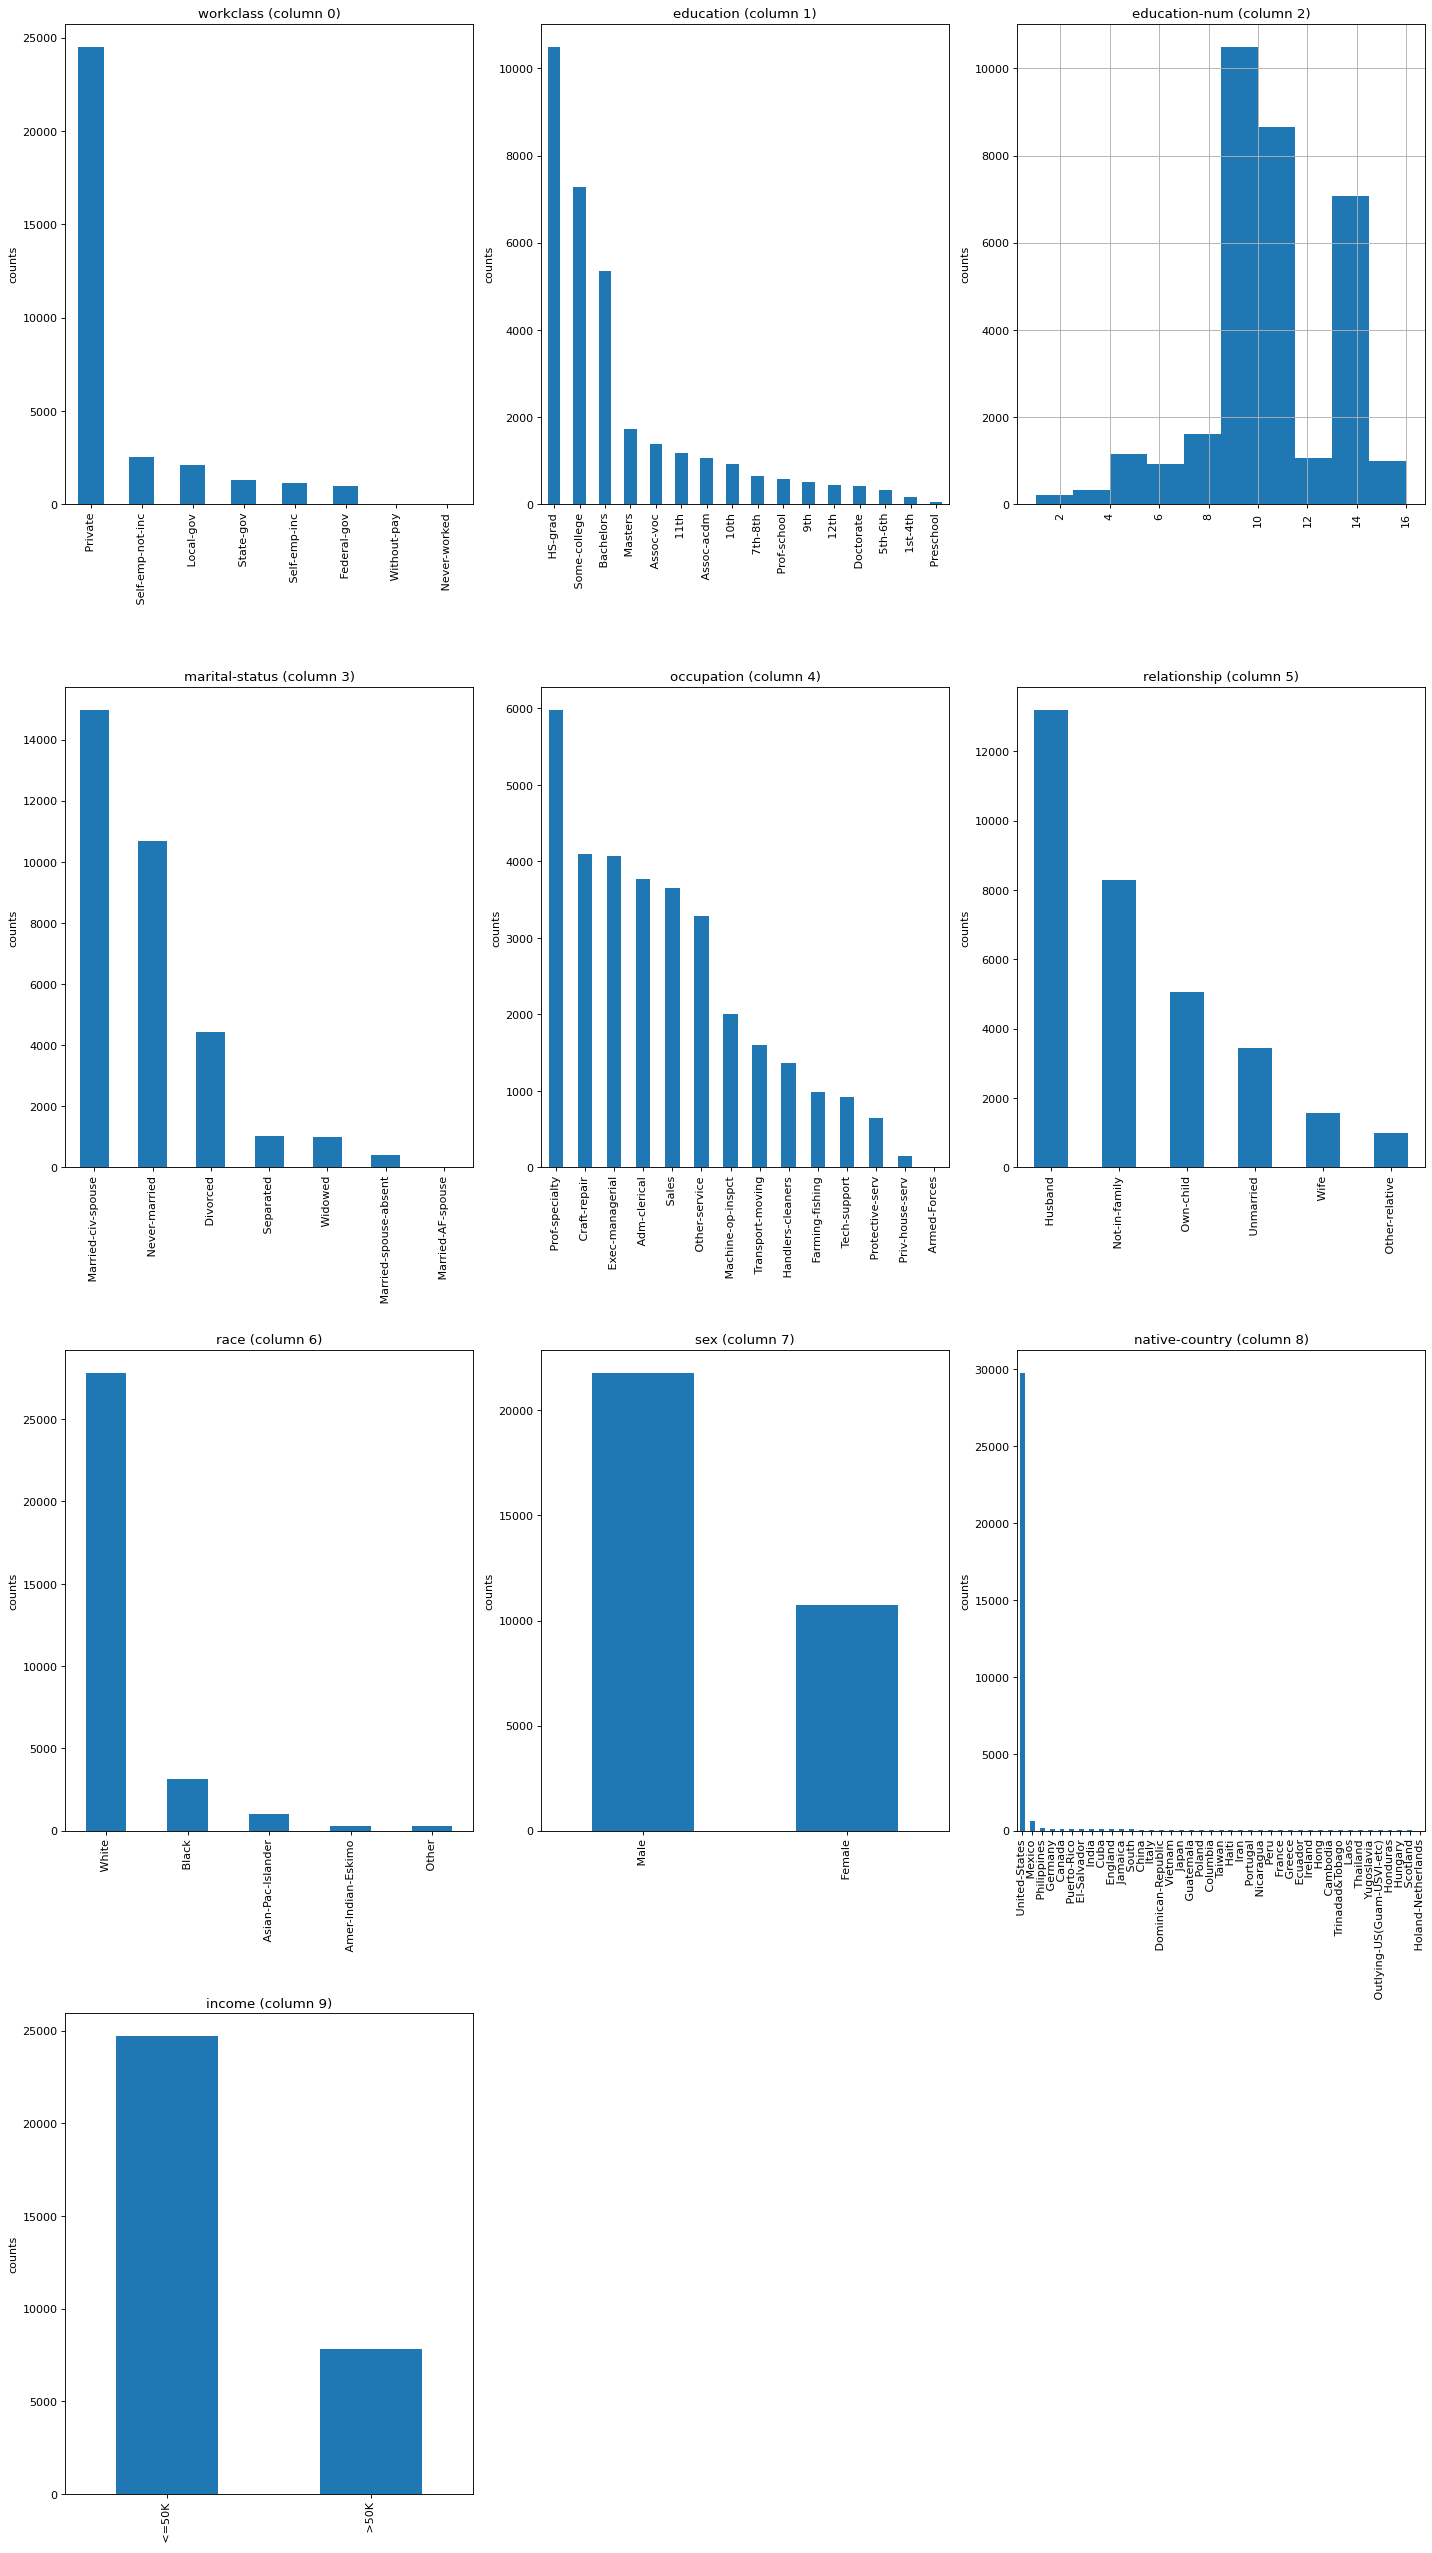

In [ ]:
plot_per_column(df, 10, 3)

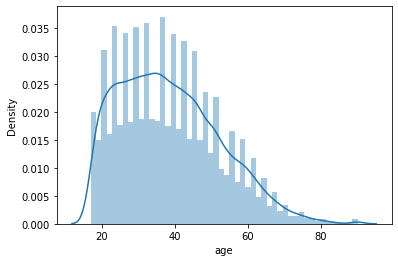

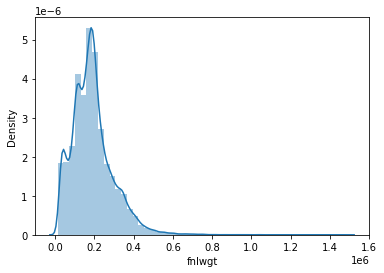

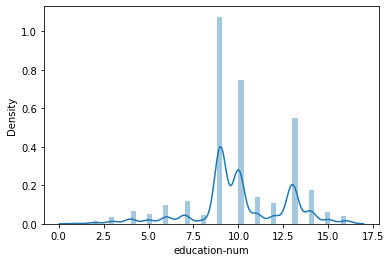

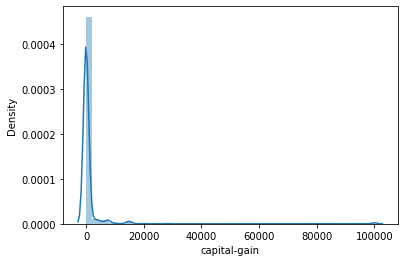

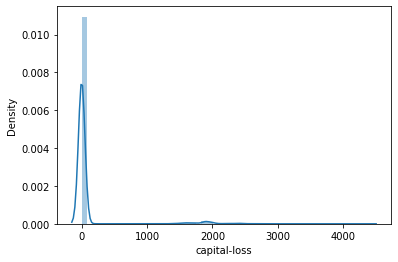

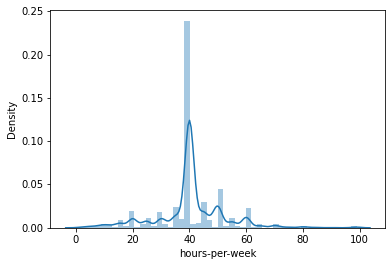

In [ ]:
import seaborn as sns

for i in cont:
  sns.distplot(df[i])
  plt.show()

Dari grafik di atas, kita bisa simpulkan bahwa:
* Kolom fnlwgt hanya angka sensus dan itu tidak berguna untuk *model* prediksi, jadi kolom fnlwgt bisa kita *drop* saja.
* Kolom *education-num* adalah *ordered-encoding* dari kolom *education*.
* Adanya *outliers* pada kolom *capital gain* and *capital loss*, kemudian pada histogram di bawah, diketahui bahwa varians dari kolom *capital gain* and *capital loss* terlalu tinggi, maka kedua kolom tersebut bisa kita *drop*.

Nilai skew kolom capital-gain 11.948851942756669


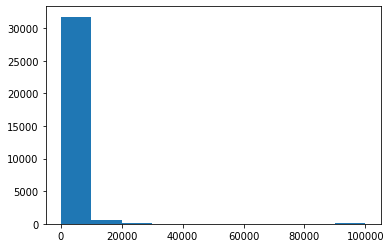

In [ ]:
from scipy import stats
print("Nilai skew kolom capital-gain", stats.skew(df['capital-gain']))

plt.hist(df['capital-gain'])
plt.show()

Nilai skew kolom capital-loss 4.592490690725554


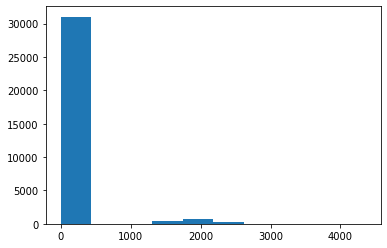

In [ ]:
print("Nilai skew kolom capital-loss", stats.skew(df['capital-loss']))

plt.hist(df['capital-loss'])
plt.show()

workclass :



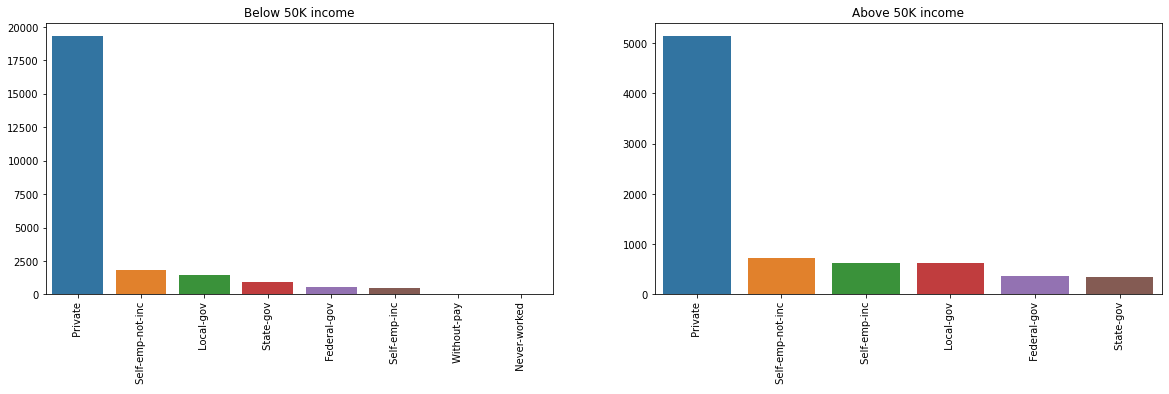

education :



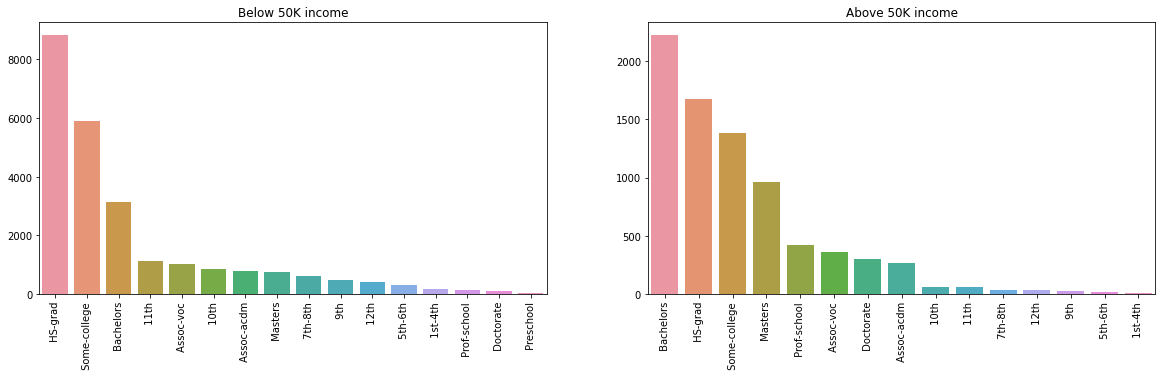

marital-status :



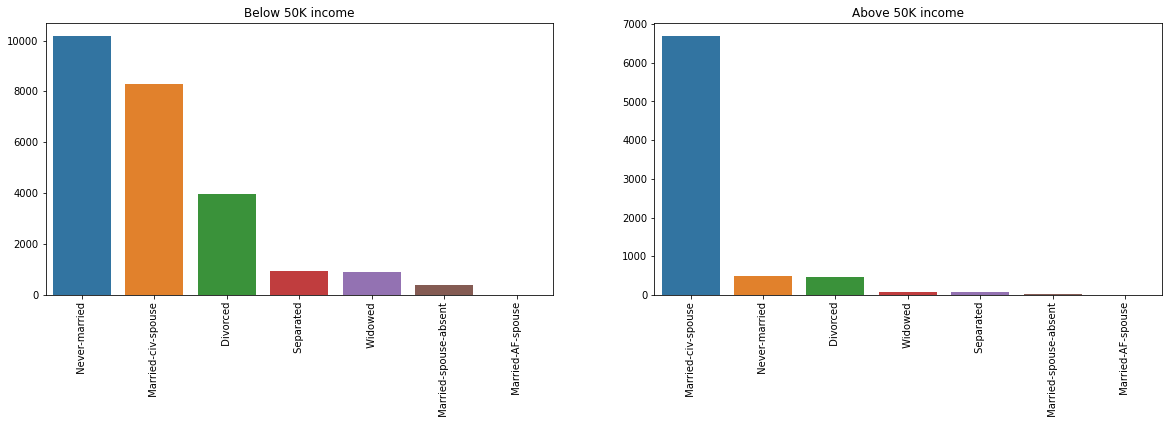

occupation :



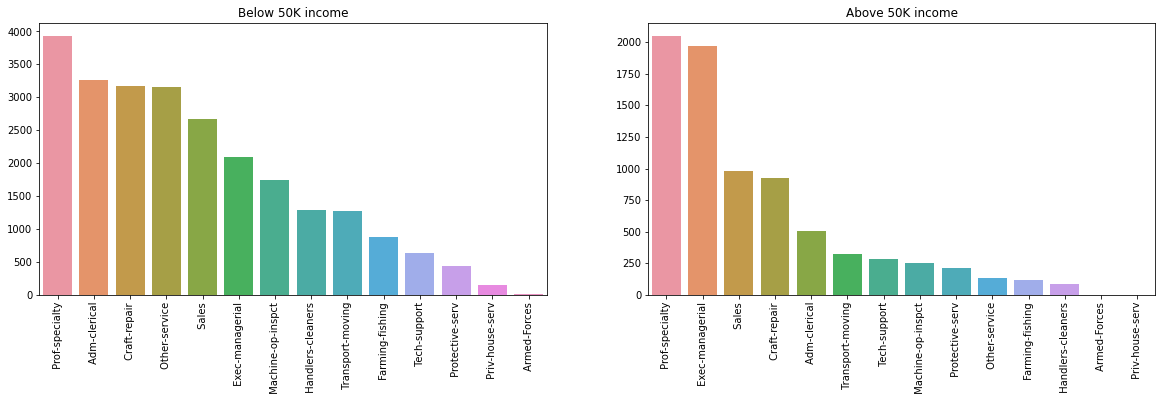

relationship :



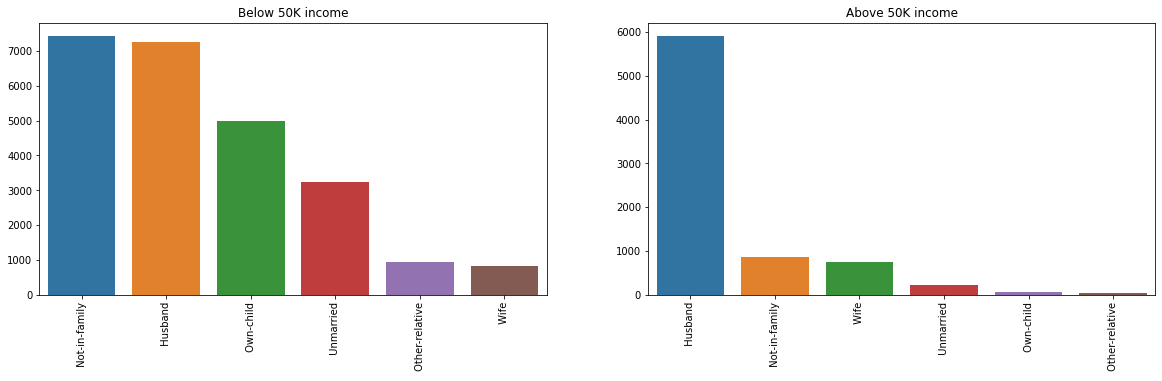

race :



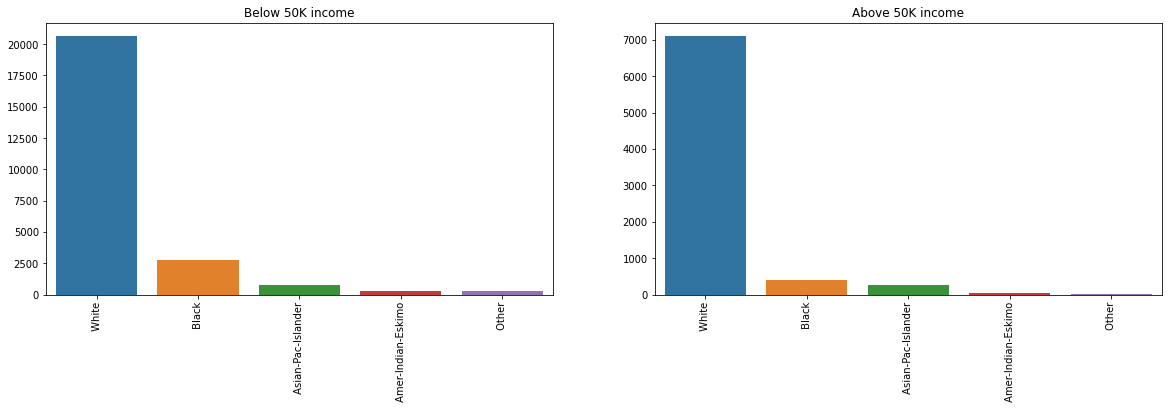

sex :



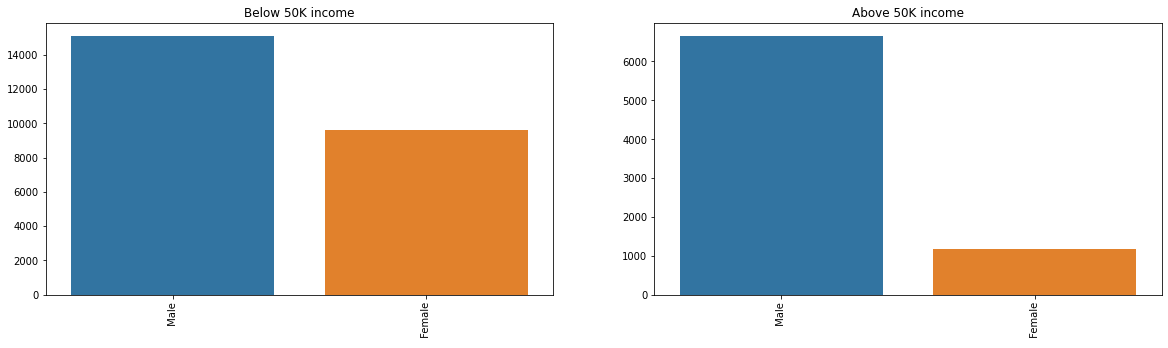

native-country :



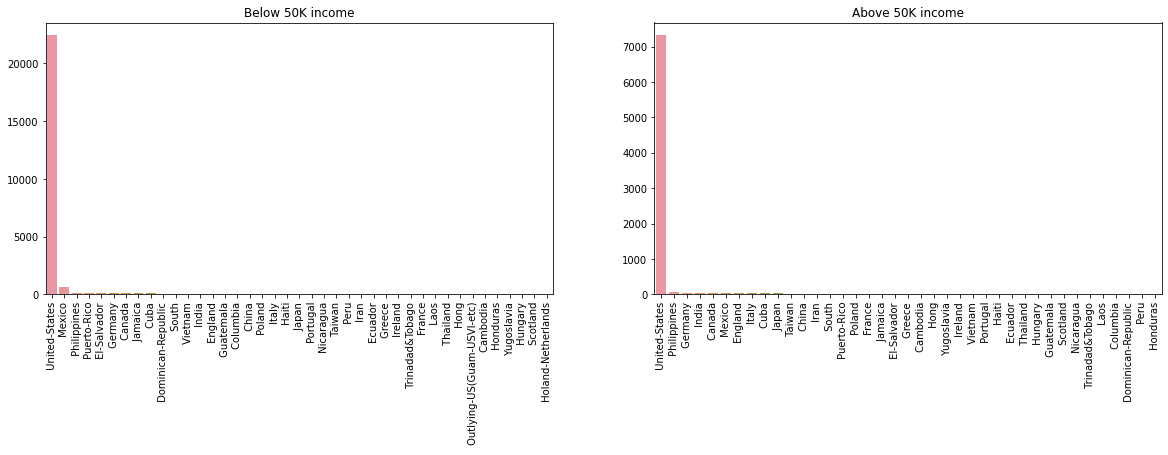

income :



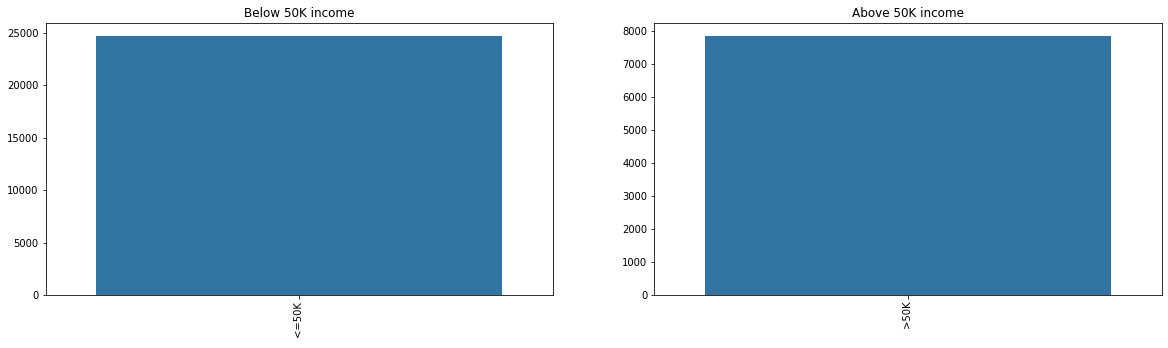

In [ ]:
def catg_vis(dt,cg):
  plt.figure(figsize=(20,5))
  a=dt[dt['income']==' <=50K'][cg].value_counts() # Below 50k income
  b=dt[dt['income']==' >50K'][cg].value_counts() # Above 50k income
  plt.subplot(1,2,1)
  plt.title('Below 50K income')
  sns.barplot(a.index,a.values)
  plt.xticks(rotation = 90)
  plt.subplot(1,2,2)
  plt.title('Above 50K income')
  sns.barplot(b.index,b.values)
  plt.xticks(rotation = 90)
  plt.show()

for i in catg:
  print(i,':\n')
  catg_vis(df,i)

Dari grafik di atas, kita bisa simpulkan bahwa:
* *Drop* kolom *workclass* , *marital-status*, *relationship* , *country*.
* *Drop* kolom *education* karena sudah ada kolom kontinu *education-num*.

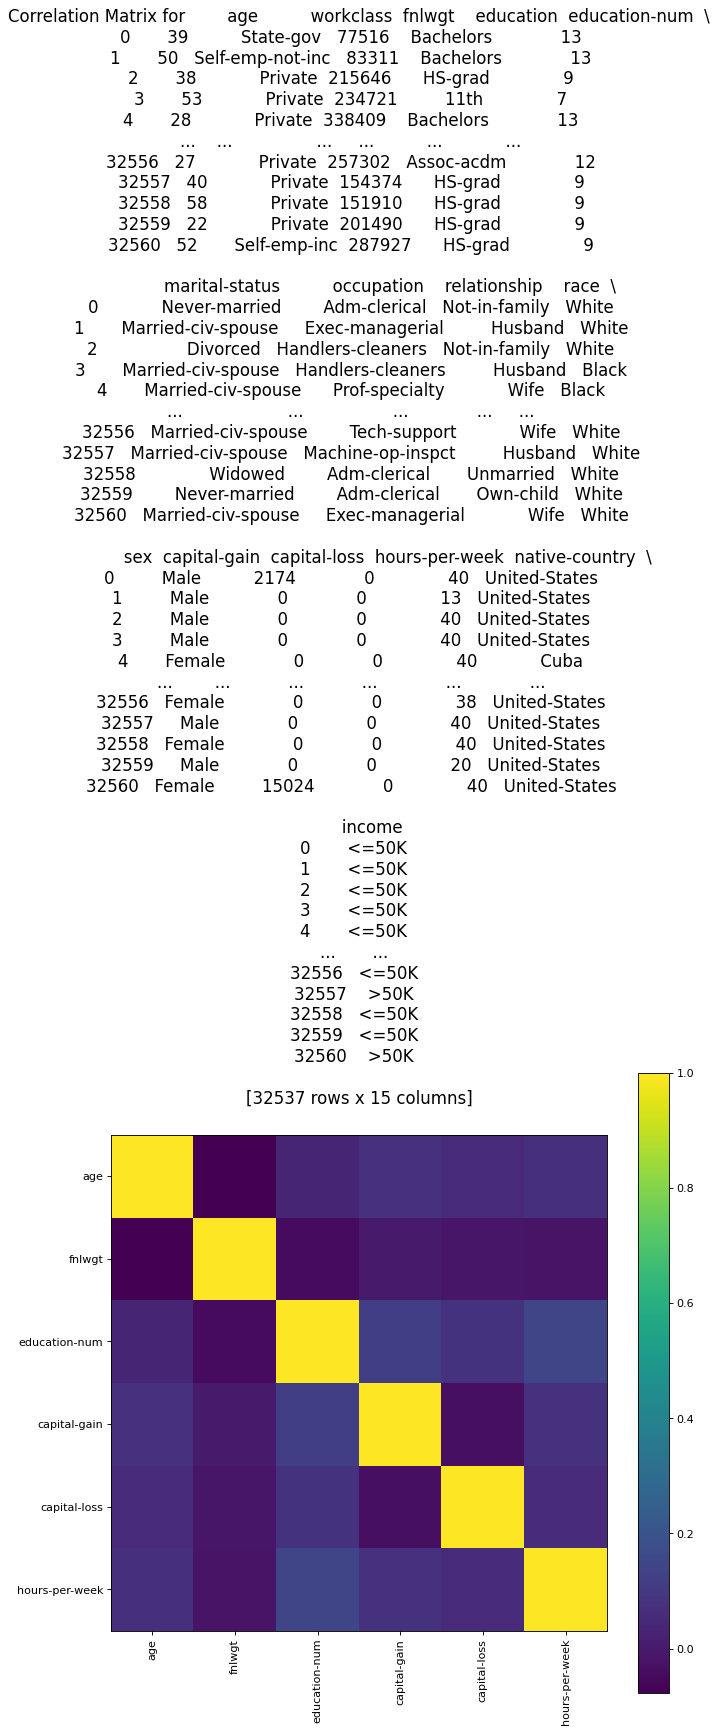

In [ ]:
# Correlation matrix
def plot_correlation_matrix(df, graphWidth):
    filename = df
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

plot_correlation_matrix(df, 10)

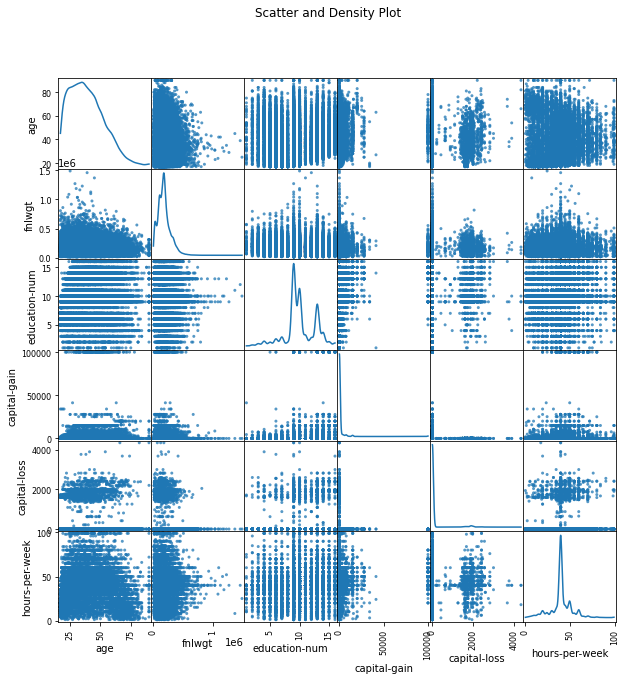

In [ ]:
# Scatter and density plots
def plot_scatter_matrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    #for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
    #    ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plot_scatter_matrix(df, 10, 10)

# Describe it

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df['income'].value_counts()

 <=50K    24698
 >50K      7839
Name: income, dtype: int64

In [ ]:
df['income'].describe()

count      32537
unique         2
top        <=50K
freq       24698
Name: income, dtype: object

# Penambangan df menggunakan SVM

Referensi kode: https://www.kaggle.com/code/anuragnayak03/adult-income-classification-using-all-classifiers#Model-Selection

In [ ]:
y = np.where(df["income"] == " <=50K", 0, 1)
X = df.drop(['income'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = df['sex'].values
df['sext'] = le.fit_transform(y)
y = df['occupation'].values
df['occupationt'] = le.fit_transform(y)
y = df['race'].values
df['racet'] = le.fit_transform(y)

df['incomet'] = le.fit_transform(df['income'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [ ]:
from sklearn.model_selection import train_test_split

sel_cols = ['age','education-num','hours-per-week','occupationt','racet','sext'] # Kolom-kolom yang dipilih untuk bahan latih & tes mesin
X_train,X_test,y_train,y_test = train_test_split(df[sel_cols],df['incomet'], test_size=0.3)

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma = 0.3)
svc.fit(X_train, y_train)

SVC(gamma=0.3)

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      7302
           1       0.69      0.36      0.47      2460

    accuracy                           0.80      9762
   macro avg       0.75      0.65      0.67      9762
weighted avg       0.78      0.80      0.77      9762


Accuracy: 0.7977873386601106
Precision Macro Average: 0.7525228005236981
Precision Micro Average: 0.7977873386601106
Recall Macro Average: 0.6516133234462994
Recall Micro Average: 0.7977873386601106
F1 Macro Average: 0.6728966543442534
F1 Micro Average: 0.7977873386601106


Confusion Matrix



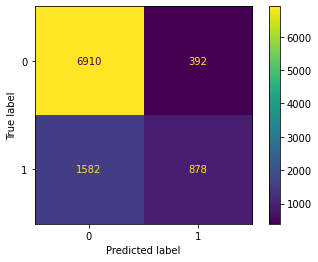

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score, ConfusionMatrixDisplay

print("Hasil Evaluasi:\n\n%s\n" % (classification_report(y_test, svc.predict(X_test))))

# Butuh informasi lebih lengkap? silakan disimak di bawah ini
print('Accuracy:', accuracy_score(y_test, svc.predict(X_test)))
print('Precision Macro Average:', precision_score(y_test, svc.predict(X_test), average='macro'))
print('Precision Micro Average:', precision_score(y_test, svc.predict(X_test), average='micro'))
print('Recall Macro Average:', recall_score(y_test, svc.predict(X_test), average='macro'))
print('Recall Micro Average:', recall_score(y_test, svc.predict(X_test), average='micro'))
print('F1 Macro Average:', f1_score(y_test, svc.predict(X_test), average='macro'))
print('F1 Micro Average:', f1_score(y_test, svc.predict(X_test), average='micro'))

# Confusion Matrix
print("\n\nConfusion Matrix\n")
ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)

# Penambangan df menggunakan Neural Network

Referensi kode: https://www.kaggle.com/code/jhskaggle/l21-artificial-neural-networks-ii

In [ ]:
y = np.where(df["income"] == " <=50K", 0, 1)
X = df.drop(['income'], axis=1)

In [ ]:
X = pd.get_dummies(X)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

clf = MLPClassifier(
    solver='lbfgs',
    alpha=1e-5,
    hidden_layer_sizes=(3, 3),
    random_state=2021,
    verbose=True
)

clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=2021,
              solver='lbfgs', verbose=True)

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7326
           1       1.00      1.00      1.00      2436

    accuracy                           1.00      9762
   macro avg       1.00      1.00      1.00      9762
weighted avg       1.00      1.00      1.00      9762


Accuracy: 1.0
Precision Macro Average: 1.0
Precision Micro Average: 1.0
Recall Macro Average: 1.0
Recall Micro Average: 1.0
F1 Macro Average: 1.0
F1 Micro Average: 1.0


Confusion Matrix



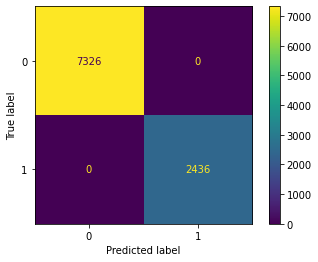

In [ ]:
print("Hasil Evaluasi:\n\n%s\n" % (classification_report(y_test, clf.predict(X_test))))
print('Accuracy:', accuracy_score(y_test, clf.predict(X_test)))
print('Precision Macro Average:', precision_score(y_test, clf.predict(X_test), average='macro'))
print('Precision Micro Average:', precision_score(y_test, clf.predict(X_test), average='micro'))
print('Recall Macro Average:', recall_score(y_test, clf.predict(X_test), average='macro'))
print('Recall Micro Average:', recall_score(y_test, clf.predict(X_test), average='micro'))
print('F1 Macro Average:', f1_score(y_test, clf.predict(X_test), average='macro'))
print('F1 Micro Average:', f1_score(y_test, clf.predict(X_test), average='micro'))
print("\n\nConfusion Matrix\n")
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)